In [1]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1.0,stoptime=10.0,dt=1.0,name='coffeeTemperatureModel')

In [23]:
coffeeTemperature = model.stock("coffeeTemperature")
coffeeTemperature.initial_value = float(95)

In [3]:
temperatureChange = model.flow("temperatureChange")

In [4]:
roomTemperature = model.constant("roomTemperature")
discrepancy = model.converter("discrapancy")
temperatureChangeRate = model.converter("temperatureChangeRate")

In [5]:
roomTemperature.equation = 25.0
discrepancy.equation = roomTemperature - coffeeTemperature
temperatureChangeRate.equation = 0.25 * discrepancy
coffeeTemperature.equation = temperatureChangeRate

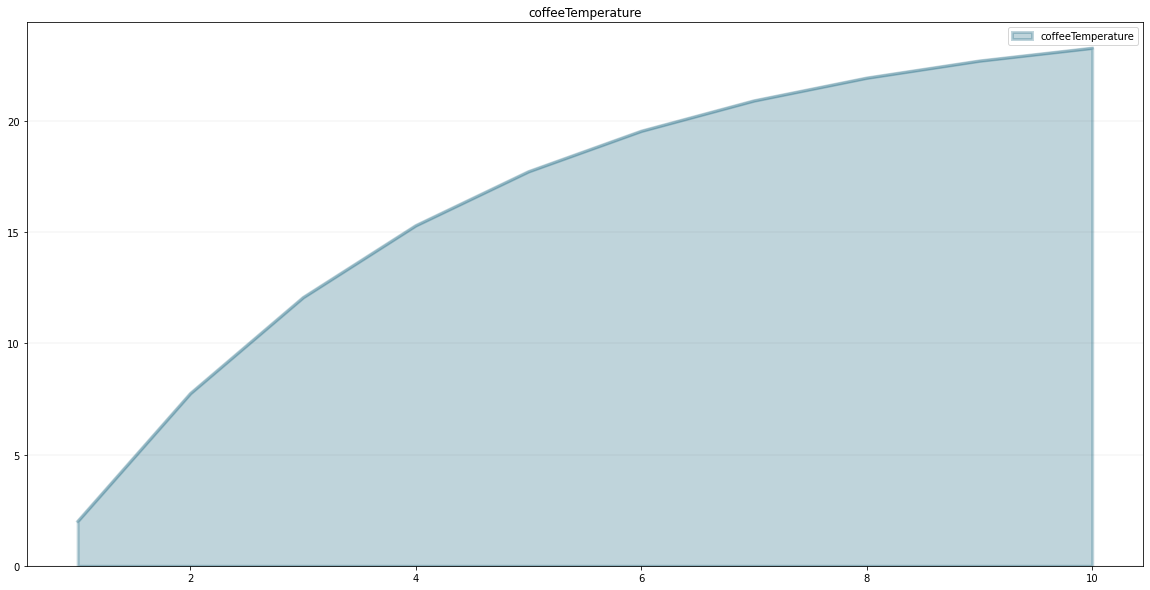

In [6]:
coffeeTemperature.plot()

In [25]:
import BPTK_Py
bptk = BPTK_Py.bptk()
bptk.register_model(model)

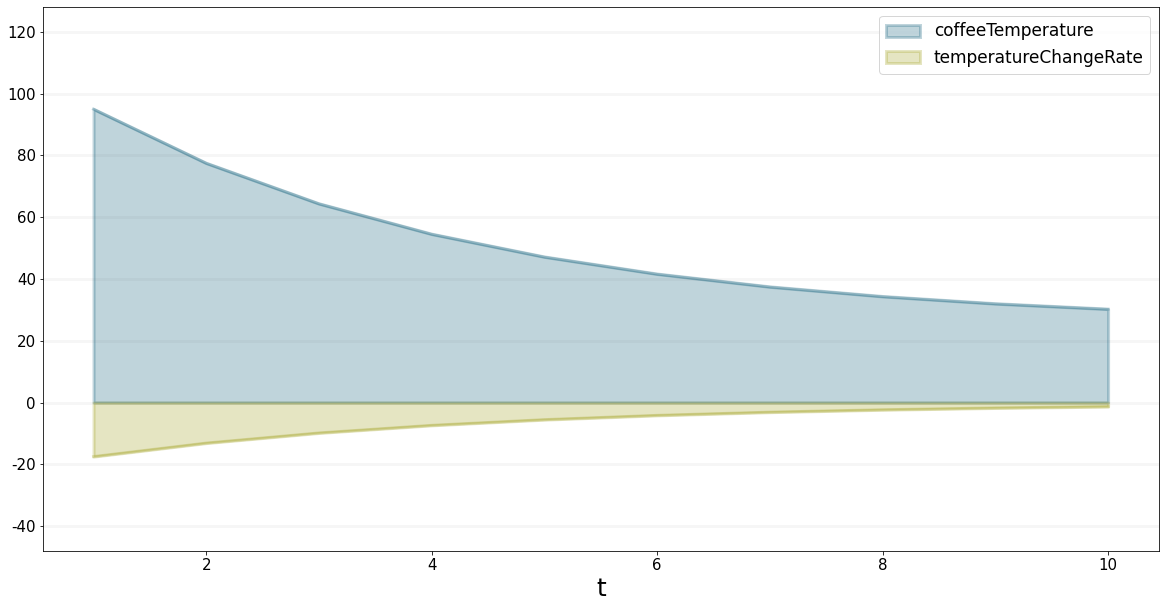

In [26]:
bptk.plot_scenarios(
    scenarios="base",
    scenario_managers="smCoffeetemperaturemodel",
    equations=["coffeeTemperature","temperatureChangeRate"])

In [27]:
scenario_manager = {
    "smCoffeetemperaturemodel":{
        "model": model,
        "base_constants": {
            "roomTemperature": 25.0,
            "coffeeTemperature": 100.0
        }
    }
}

In [28]:
bptk.register_scenario_manager(scenario_manager)

In [29]:
bptk.register_scenarios(
    scenarios ={
        "scenario07": {
            "constants": {
                "roomTemperature": 35.0,
            }
        },
        "scenario08": {
            "constants": {
                "roomTemperature": 0.0,
#                 "coffeeTemperature": 50.0
            }
        }
    },
    scenario_manager="smCoffeetemperaturemodel")

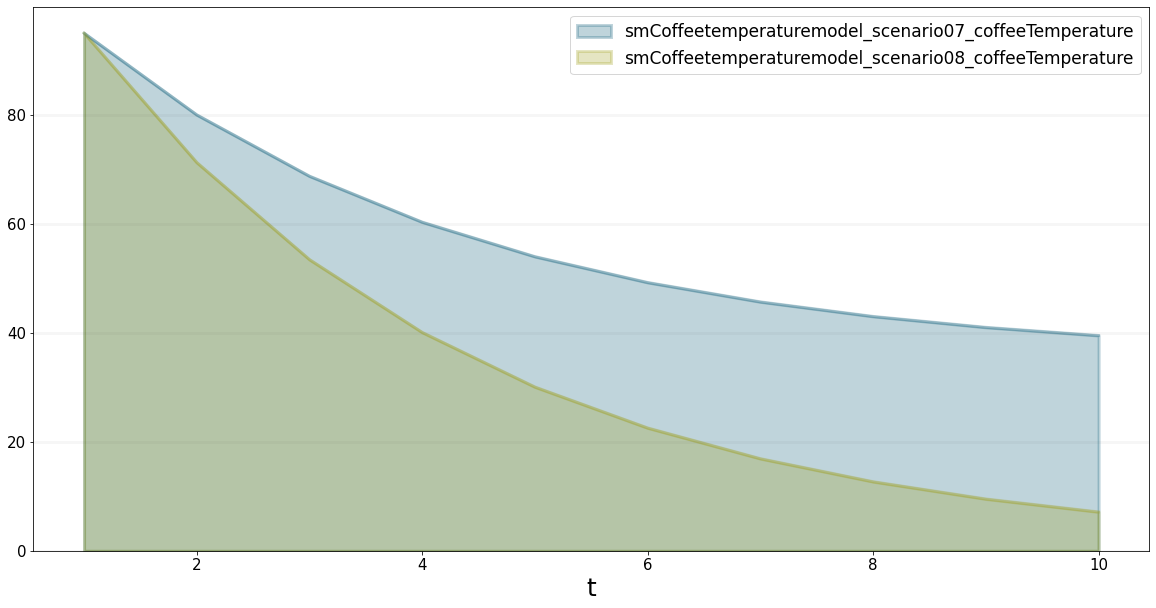

In [30]:
bptk.plot_scenarios(
    scenarios=["scenario07", "scenario08"],
    scenario_managers="smCoffeetemperaturemodel",
    equations=["coffeeTemperature"],
    series_names={}
)